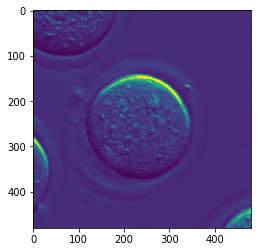

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgfile = r"C:\Users\stefa\Desktop\Queens\Fourth Year\MTHE493\Database\E00\Frame001.png"
img = cv2.imread(imgfile)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

Kernel Blur


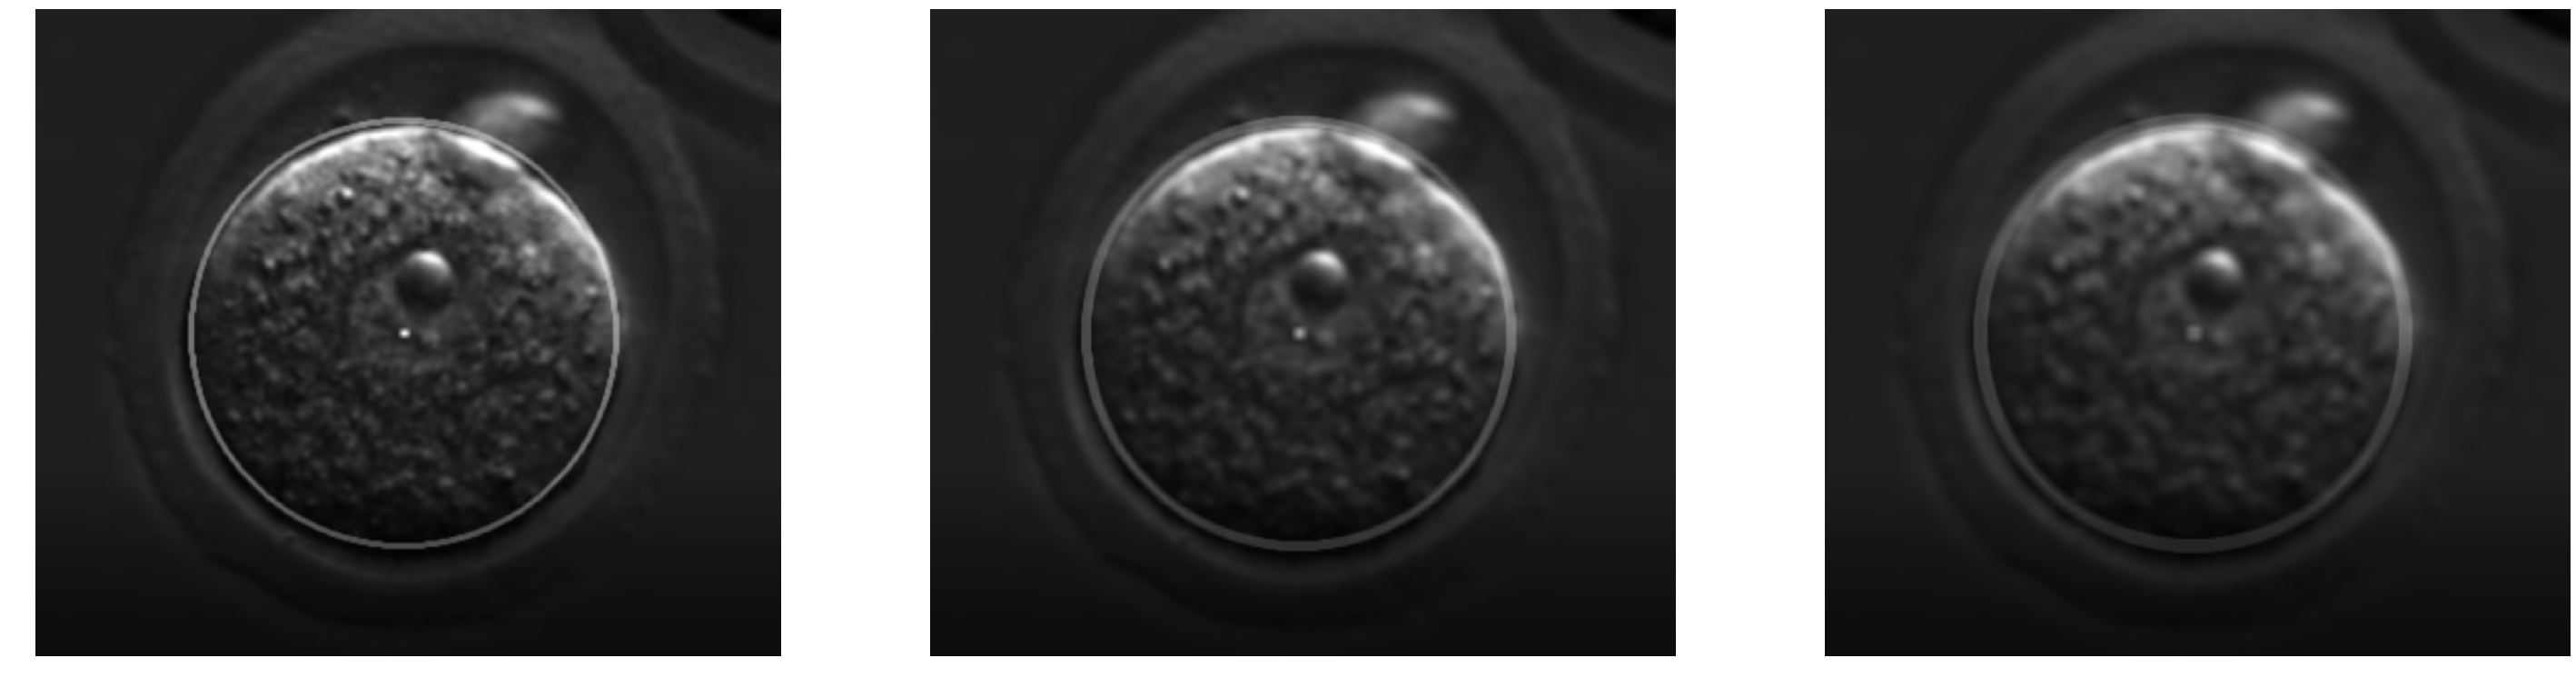

Gaussian Blur


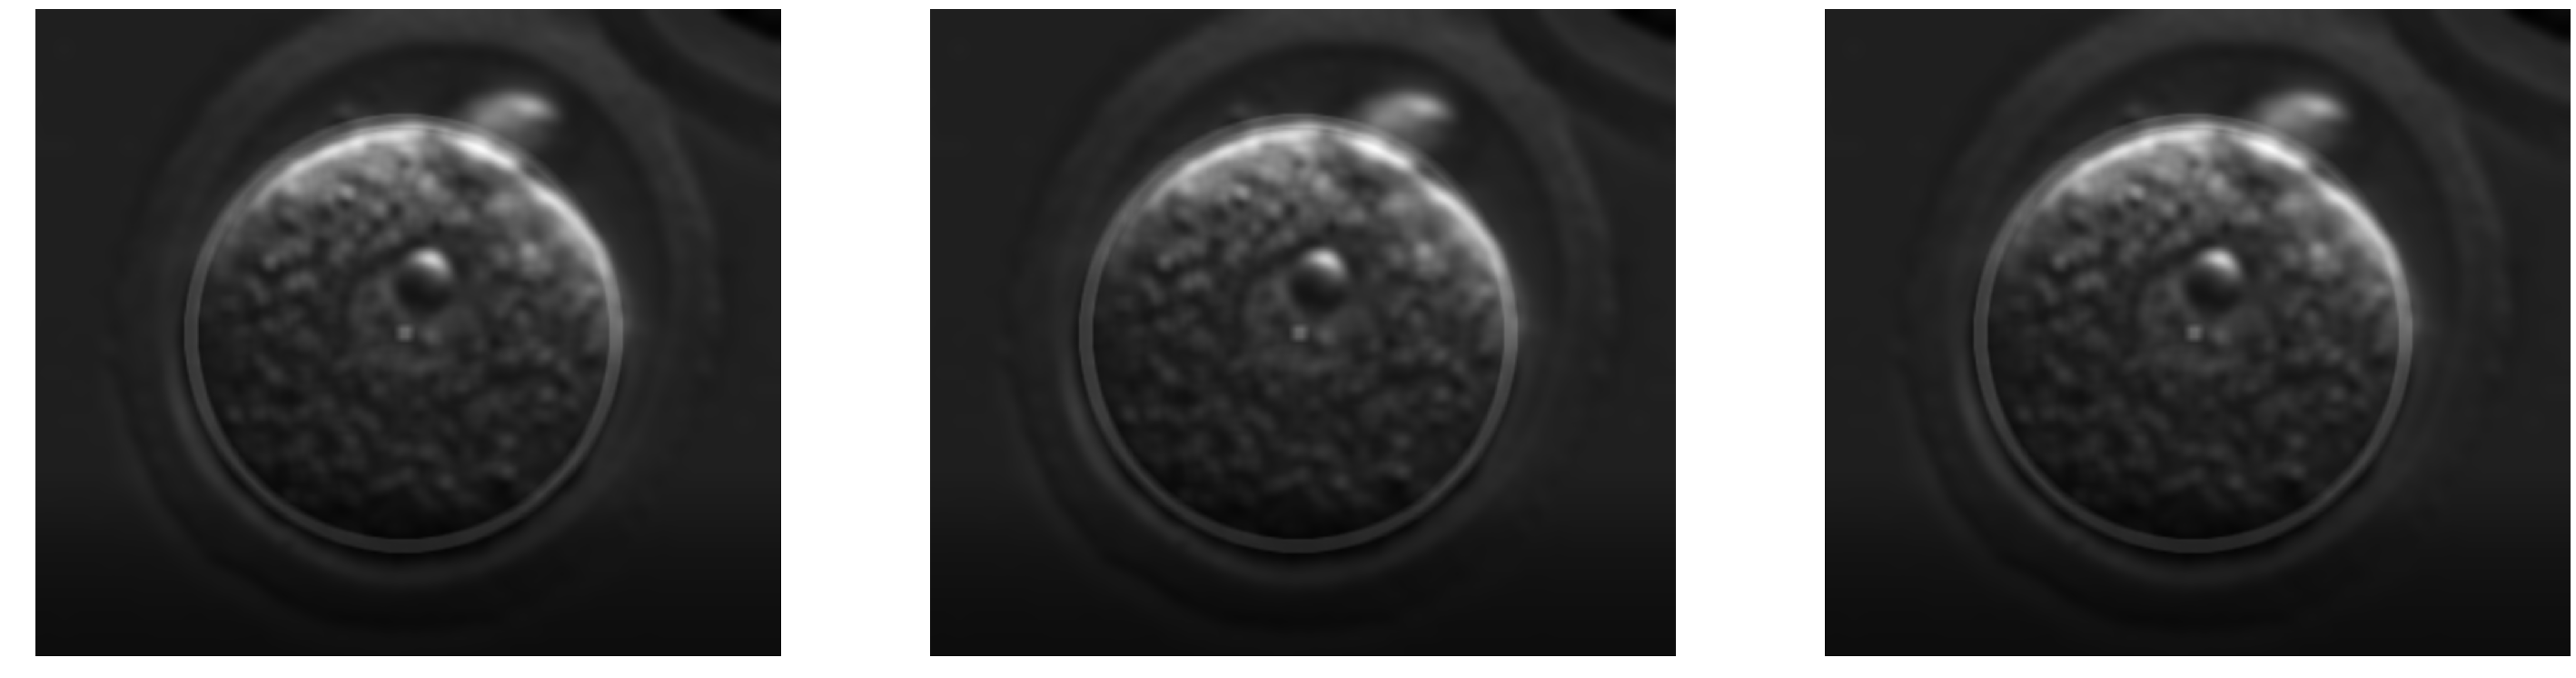

Median Blur


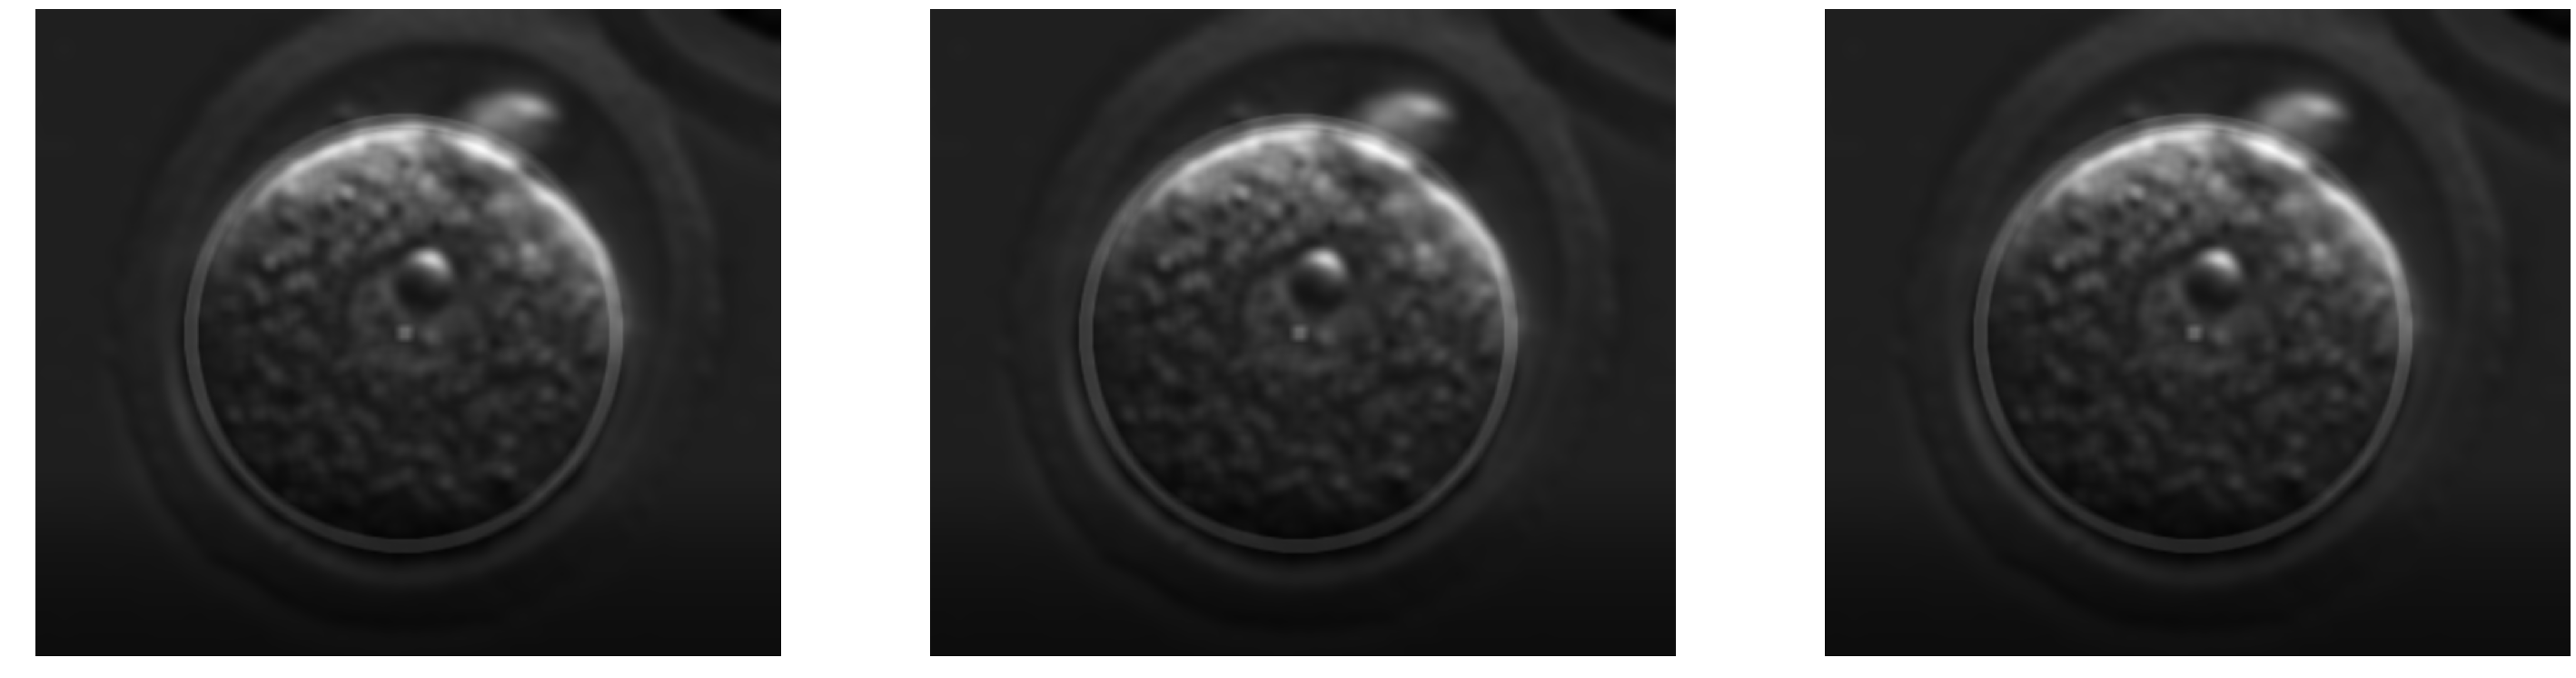

Bilateral Filter


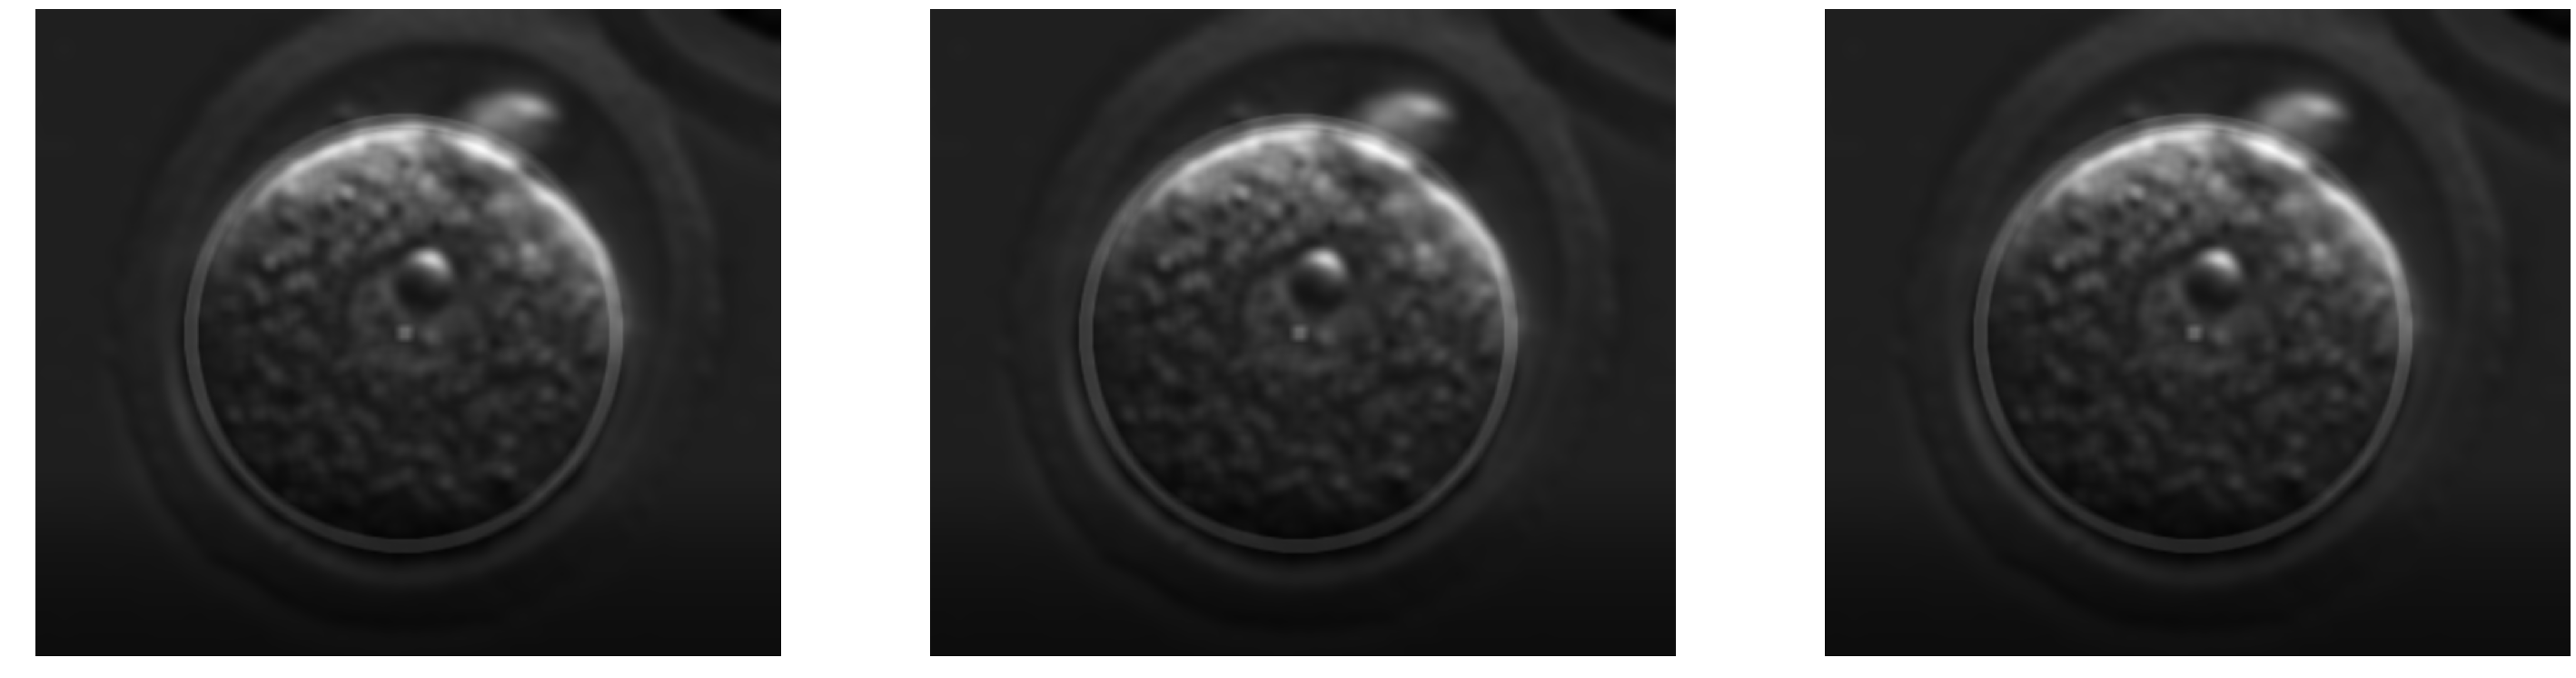

In [11]:
## Blurring
img = cv2.imread(imgfile)

kernels = [11, 18, 25]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (50,50))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blurred =cv2.blur(img, ksize = (s,s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
print("Kernel Blur")
plt.show()

## Gaussian Blur

kernels = [5, 7, 9]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (50,50))
for ind, s in enumerate(kernels):
    img_GaussianBlurred = cv2.blurred =cv2.GaussianBlur(img, ksize = (s,s), sigmaX = 0)
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
print("Gaussian Blur")
plt.show()

## Median Blur

kernels = [5, 7, 9]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (50,50))
for ind, s in enumerate(kernels):
    img_MedianBlurred = cv2.blurred =cv2.medianBlur(img, s)
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
print("Median Blur")
plt.show()

## Bilateral Filter

kernels = [5, 7, 9]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (50,50))
for ind, s in enumerate(kernels):
    img_bilateralFiltered = cv2.blurred =cv2.bilateralFilter(img, s, sigmaSpace = 75, sigmaColor = 75)
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
print("Bilateral Filter")
plt.show()

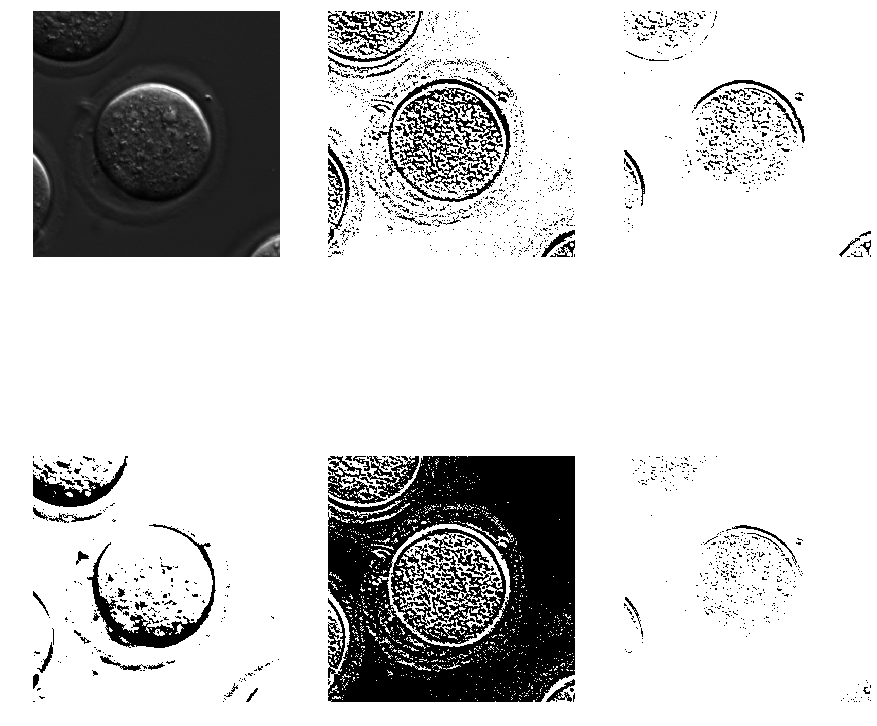

In [20]:
## Thresholding
img = cv2.imread(imgfile)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh_binary = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)

images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

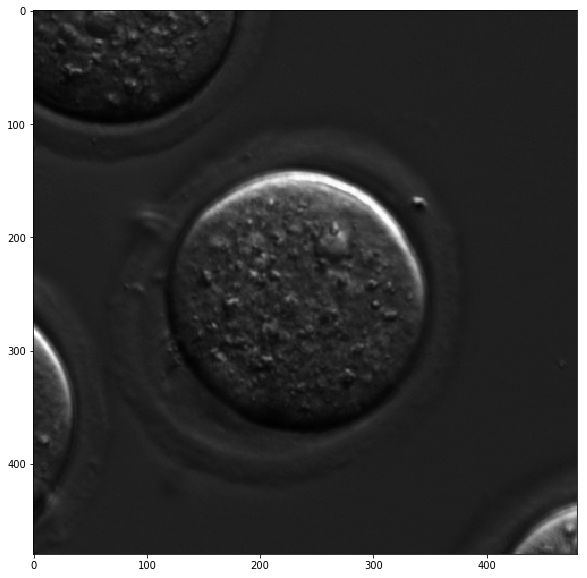

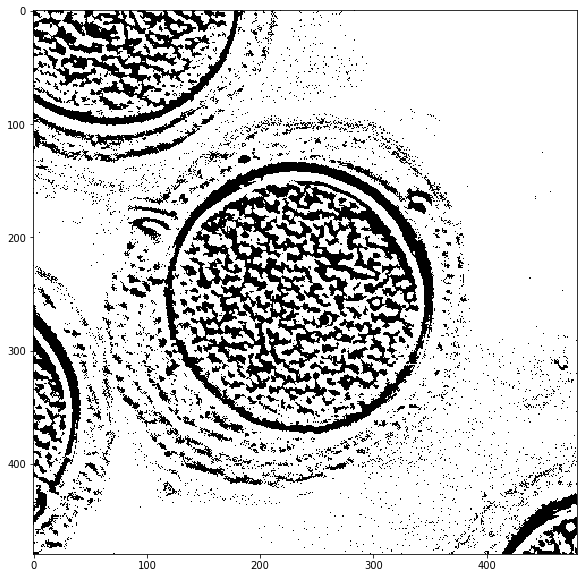

In [22]:
plt.figure(figsize = (20, 10))
plt.imshow(img, cmap="gray")
plt.show()
plt.figure(figsize = (20, 10))
plt.imshow(adap_mean_2, cmap="gray")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


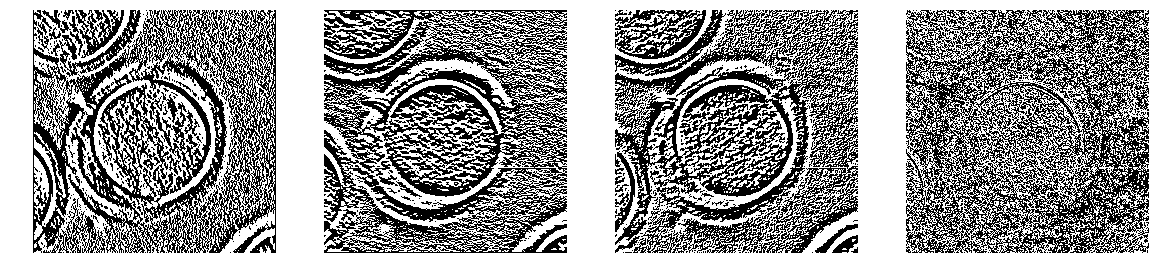

In [9]:
## Gradient
img = cv2.imread(imgfile)

sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

images = [sobel_x, sobel_y, blended, laplacian]
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()

Erosion Transformation


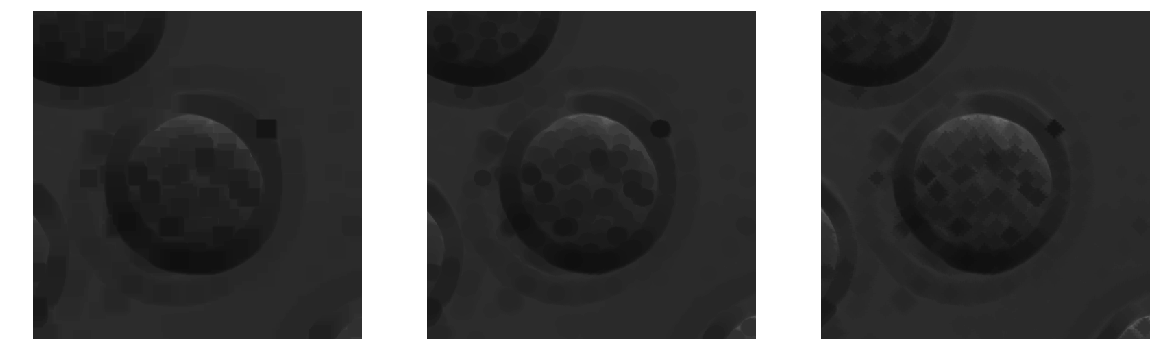

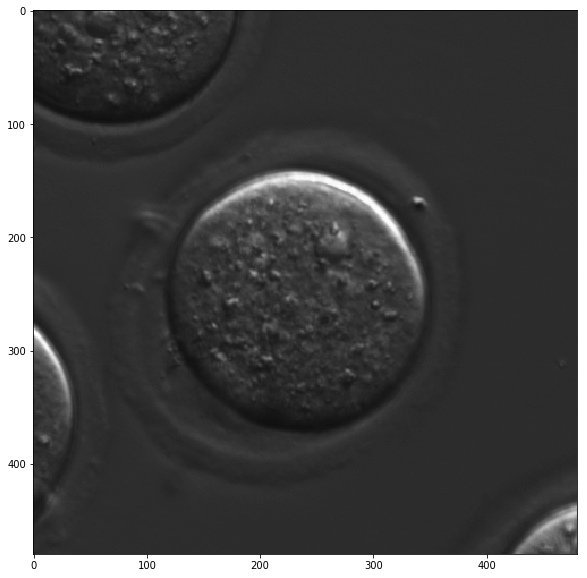

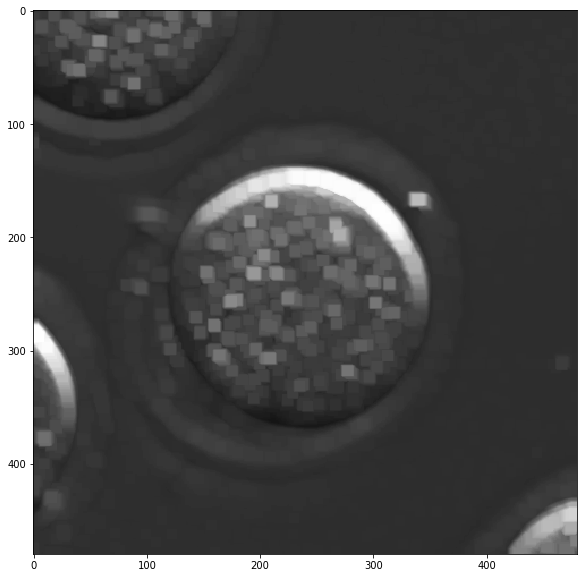

Dilation Transformation
Opening and Closing


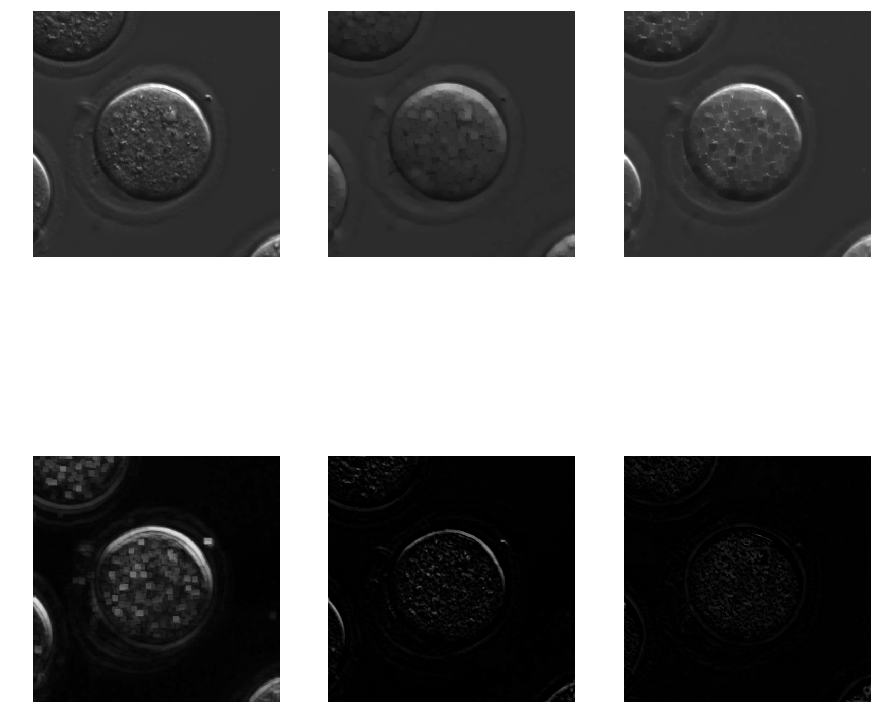

In [11]:
## Morphological Transformations
img = cv2.imread(imgfile)

## Erosion
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))

kernels = [kernel_0, kernel_1, kernel_2]

plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
print("Erosion Transformation")
plt.show()

## Dilation
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 1)
plt.figure(figsize = (20, 10))
plt.imshow(img, cmap="gray")
plt.show()
plt.figure(figsize = (20, 10))
plt.imshow(img_dilate, cmap="gray")
plt.show()
print("Dilation Transformation")


## Opening and Closing (Mixed Erosion and Dilation)
kernel = np.ones((9, 9), np.uint8)
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

images = [img, img_open, img_close, img_grad, img_tophat, img_blackhat]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
print("Opening and Closing")
plt.show()

Canny Detection


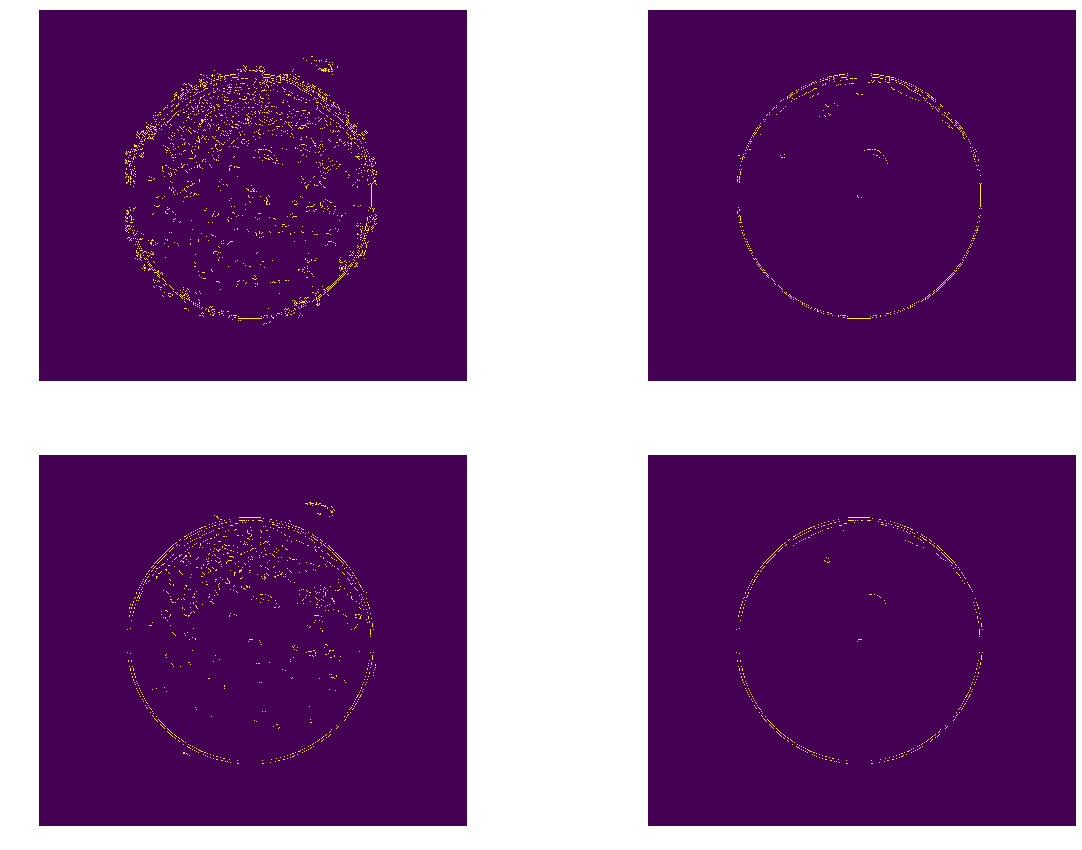

In [31]:
## Canny Edge Detection
img = cv2.imread(imgfile)
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))

img_k5 = cv2.blur(img, ksize = (5, 5))
img_k9 = cv2.blur(img, ksize = (9, 9))
edges_k5 = cv2.Canny(img_k5, lower, upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper+100)
edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower, upper+100)

images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
print("Canny Detection")
plt.show()

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [ 31  31  31]
  ...
  [ 13  13  13]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [ 13  13  13]
  ...
  [ 13  13  13]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


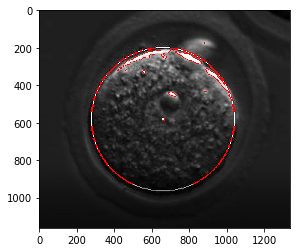

In [3]:
## Contour Detection
img = cv2.imread(imgfile)
img_blur = cv2.bilateralFilter(img, d = 7, sigmaSpace = 75, sigmaColor =75)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
a = img_gray.max()  
ret, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True) # sort contour lines by area
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy)

1st Contour Area :  1552080.0
2nd Contour Area :  5111.0
3rd Contour Area :  4144.5
1st Arc Length :  4996.0
2nd Arc Length :  3658.0


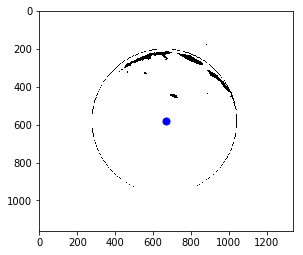

In [50]:
## Contour Moments
img = cv2.imread(imgfile)
img_blur = cv2.bilateralFilter(img, d = 7, sigmaSpace = 75, sigmaColor =75)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
a = img_gray.max()  
ret, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)

c_0 = contours[0]
M = cv2.moments(c_0) # returns the image moments
print("1st Contour Area : ", cv2.contourArea(contours[0])) # hierarchy works by area size
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))
print("1st Arc Length : ", cv2.arcLength(contours[0], closed = True)) # arclength of closed or open curves
print("2nd Arc Length : ", cv2.arcLength(contours[0], closed = False))
# The centroid point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
# The extreme points
# l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
# r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
# t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
# b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])
# pst = [l_m, r_m, t_m, b_m]
# xcor = [p[0] for p in pst]
# ycor = [p[1] for p in pst]
# Plot the points
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)
# plt.subplot(1, 2, 2)
# plt.imshow(thresh, cmap = 'gray')
# plt.scatter(xcor, ycor, c = 'b', s = 50)

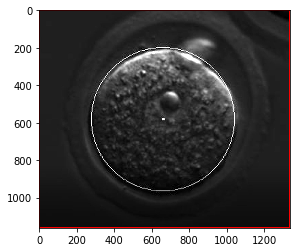

In [59]:
## Circle Contour

c_0 = contours[0]
hull = cv2.convexHull(c_0)
img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, [hull], contourIdx = 0, color = (255, 0, 0), thickness = 5)
plt.imshow(img_hull)